## Figure - Impact of bulk plate motion on the `asc/dsc to horz/vert` decomposition

In [1]:
%matplotlib inline
import os
import numpy as np
from matplotlib import pyplot as plt
from cartopy import crs as ccrs, feature as cfeature
from mintpy.utils import readfile, utils as ut, plot as pp
from mintpy import view, asc_desc2horz_vert
import pyproj
plt.rcParams.update({'font.size': 12, 'font.family':'Helvetica'})

pic_dir  = os.path.abspath(os.path.join('../pic'))
print('Picture directory:', pic_dir)

work_dir = os.path.expanduser('/marmot-nobak/ykliu/aqaba/topsStack/a087/mintpy/velocity_out')
os.chdir(work_dir)
print('Go to directory:', work_dir)


Picture directory: /net/kraken/nobak/ykliu/2022-BulkMotion/pic
Go to directory: /marmot-nobak/ykliu/aqaba/topsStack/a087/mintpy/velocity_out


## Plot

In [7]:
# input files
mask       = os.path.join('/marmot-nobak/ykliu/aqaba/topsStack/a087/mintpy/maskTempCoh_high.h5')
file1      = os.path.join(work_dir, 'velocity.h5')
file2      = os.path.join(work_dir, 'velocity_ITRF14.h5')
file3      = os.path.join(work_dir, 'velocity_linearRamp.h5')
file4      = os.path.join(work_dir, 'velocity_quadraticRamp.h5')
dem_file   = os.path.expanduser('/marmot-nobak/ykliu/aqaba/topsStack/a087/mintpy/inputs/srtm.dem')


# input datasets and view.py options
dset_strs = [
    f'view.py {file1}  velocity  --figtitle Initial   --lalo-loc 1 0 0 1 ',
    f'view.py {file2}  velocity  --figtitle ITRF2014  --lalo-loc 0 0 0 1 ',
    f'view.py {file3}  velocity  --figtitle Linear    --lalo-loc 0 0 0 1 ',
    f'view.py {file4}  velocity  --figtitle Quadratic --lalo-loc 0 0 0 1 ',
]
cmd_base = f' -u mm/year -v -5 5 -c RdYlBu_r --lalo-label --nocbar --mask {mask} '
cmd_base += ' --noscalebar --fontsize 12 --ref-size 2 --coastline 10m --coastline-lw 0.5 --lalo-step 2 --lalo-off -30 -14 --lalo-fs 10 '
cmd_base += f' --dem {dem_file} --dem-nocontour --shade-min -5000 --shade-max 6000 --shade-exag 0.02'
cmd_base += ' --noverbose '
#cmd_base += ' --ref-lalo 28.73 36.66 '
cmd_base += ' --noreference '

view.py /marmot-nobak/ykliu/aqaba/topsStack/a087/mintpy/velocity_out/velocity.h5 velocity --figtitle Initial --lalo-loc 1 0 0 1 -u mm/year -v -5 5 -c RdYlBu_r --lalo-label --nocbar --mask /marmot-nobak/ykliu/aqaba/topsStack/a087/mintpy/maskTempCoh_high.h5 --noscalebar --fontsize 12 --ref-size 2 --coastline 10m --coastline-lw 0.5 --lalo-step 2 --lalo-off -30 -14 --lalo-fs 10 --dem /marmot-nobak/ykliu/aqaba/topsStack/a087/mintpy/inputs/srtm.dem --dem-nocontour --shade-min -5000 --shade-max 6000 --shade-exag 0.02 --noverbose --noreference
min/max [mm/year]: -169.2, 26.6
view.py /marmot-nobak/ykliu/aqaba/topsStack/a087/mintpy/velocity_out/velocity_ITRF14.h5 velocity --figtitle ITRF2014 --lalo-loc 0 0 0 1 -u mm/year -v -5 5 -c RdYlBu_r --lalo-label --nocbar --mask /marmot-nobak/ykliu/aqaba/topsStack/a087/mintpy/maskTempCoh_high.h5 --noscalebar --fontsize 12 --ref-size 2 --coastline 10m --coastline-lw 0.5 --lalo-step 2 --lalo-off -30 -14 --lalo-fs 10 --dem /marmot-nobak/ykliu/aqaba/topsStack

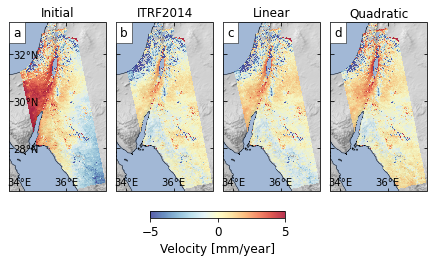

In [8]:
# plot
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, axs = plt.subplots(figsize=[7.5, 4.5], nrows=1, ncols=4, subplot_kw=subplot_kw)
for ax, dset_str in zip(axs, dset_strs):
    data, atr, inps = view.prep_slice(dset_str + cmd_base)
    data -= np.nanmedian(data.data)
    ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)
    ax.add_feature(cfeature.OCEAN, zorder=.5, alpha=.7)
    ax.add_feature(cfeature.LAKES, zorder=.5, alpha=.7)
    print(f'min/max [mm/year]: {np.nanmin(data):.1f}, {np.nanmax(data):.1f}')
fig.subplots_adjust(wspace=0.1)

# common titles
#msg =    'Bulk plate motion correction'
#msg += '\nBefore        |        After'
#fig.suptitle(msg, x=0.504, y=0.94, fontsize=12)
# subplot index
for ax, num in zip(axs, ['a', 'b', 'c', 'd']):
    ax.annotate(num, xy=(0.043, 0.920), xycoords='axes fraction', bbox=dict(facecolor='w', edgecolor='k', lw=0.5))

# colorbar
cax = fig.add_axes([0.387, 0.16, 0.25, 0.02])
cbar = fig.colorbar(im, cax=cax, orientation='horizontal')
clabel = 'Velocity [mm/year]\n'
cbar.set_label(clabel)

# output
out_fig = os.path.join(pic_dir, 'Aqaba_a087_deramp_ITRF.png')
print('save figure to file:', out_fig)
fig.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
plt.show()